In [4]:
# Visualization Dependencies
from IPython.display import Image, SVG
import seaborn as sns

# Filepaths, Numpy, Tensorflow
import os
import numpy as np
import tensorflow as tf

# Keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [5]:
from PIL import Image
import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm

files = glob.glob("imageData/imPencil/*.jpg")

train = []
for infile in tqdm(files):
    img = image.load_img(infile, target_size=(28,28), grayscale=False)
    img = img.getdata()
    img = image.img_to_array(img)
    img = img/255
    train.append(img)
X = np.array(train)

100%|██████████| 26/26 [00:00<00:00, 584.74it/s]


In [6]:
print(X.shape)

(26, 784, 3, 1)


In [7]:
X = X.reshape(26,2352)

In [8]:
from keras.utils import to_categorical
y = X.shape[0]
y = y - 1
y = to_categorical(y)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10


TypeError: 'NoneType' object is not callable

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1176500   
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 26)                13026     
                                                                 
Total params: 1440026 (5.49 MB)
Trainable params: 1440026 (5.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.save("sharpie_self_trained.h5")

In [17]:
# Load Model
from tensorflow.keras.models import load_model
model = load_model("sharpie_self_trained.h5")

In [18]:
# Evaluate Model
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: in user code:

    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/mojtabamirzadeh/anaconda3/envs/handwritten-paper-env/lib/python3.11/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 26) are incompatible


In [19]:
test = np.expand_dims(X_train[18], axis=0)
test.shape

(1, 2352)

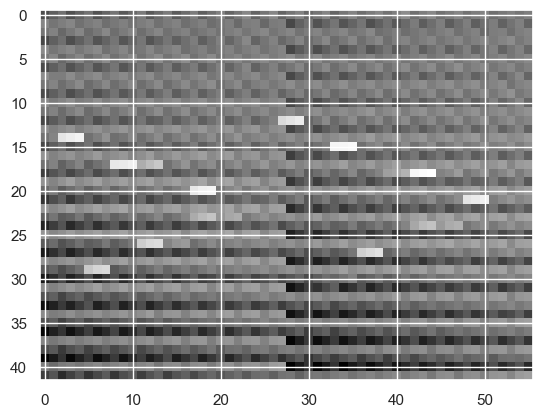

In [20]:
plt.imshow(scaler.inverse_transform(test).reshape(42,56), cmap=plt.cm.Greys)

In [22]:
# model.predict_classes(test)

# Get raw predictions
predictions = model.predict(test) 

# Get indices of maximum prediction values 
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)

1/1 [==============================] - 0s 42ms/step
[0]
